# Práctica 2
## Desarrollado por Sara Pérez y Cristian Fernández
## 21 de Octubre de 2017
## Aprendizaje automático, EPS, UAM (Madrid)
## Introducción
XXXXXXXXXXXXXXXXXXXXXXXXXXXXX
## Objetivo
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

## Trabajo Desarrollado
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

### Cargando librerias

In [17]:
#Libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # Read Dataset
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import sklearn.feature_selection as FS
%matplotlib inline


### Simplifación de datos
#### Cargar datos

In [4]:
#Path para linux
path = '../Recursos/indian_liver_patient.csv'
#path = '/media/cristian/2DA699E5347481F7/Users/Cristian/Dropbox/Universidad/Master/1ºCuatrimestre/Practicas/ML/LAB2/Recursos/indian_liver_patient.csv'


#Path para Windows
#path = '..\Recursos\indian_liver_patient.csv'
dataset = pd.read_csv(path,delimiter=',',header=0)



# Eliminación de Missing values
dataset=dataset.dropna()



# Transformación de valores a binario
#dataset.replace("Male",0, True)
#dataset.replace("Female",1,True)
dataset["Gender"] = pd.Categorical.from_array(dataset["Gender"]).codes
#Modificamos la clase, para que la clase pase de 1-2 a 0-1
dataset['Dataset']=dataset['Dataset']-1

print(dataset.head())

# División aleatorioa 70 Traning 30 Test
#msk = np.random.rand(len(dataset)) < 0.7
#data_train = dataset[msk]
#data_test = dataset[~msk]
#data_test

train_test=train_test_split(dataset, test_size=0.3)
train=train_test[0]
test=train_test[1]


   Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0   65       0              0.7               0.1                   187   
1   62       1             10.9               5.5                   699   
2   62       1              7.3               4.1                   490   
3   58       1              1.0               0.4                   182   
4   72       1              3.9               2.0                   195   

   Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                        16                          18             6.8   
1                        64                         100             7.5   
2                        60                          68             7.0   
3                        14                          20             6.8   
4                        27                          59             7.3   

   Albumin  Albumin_and_Globulin_Ratio  Dataset  
0      3.3                        0.90        0 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


In [5]:
def zScore(var):
    return (var-var.mean())/var.std()
def minMax(var):
    return (var-var.min())/(var.max()-var.min())


#Normalizamos las variables (habrá casos en los que no se puedan usar normalizadas)
testNorm=test.copy()
trainNorm=train.copy()

testNorm['Albumin']=zScore(testNorm['Albumin'])
trainNorm['Albumin']=zScore(trainNorm['Albumin'])

testNorm['Total_Protiens']=zScore(testNorm['Total_Protiens'])
trainNorm['Total_Protiens']=zScore(trainNorm['Total_Protiens'])

testNorm['Total_Bilirubin']=minMax(testNorm['Total_Bilirubin'])
trainNorm['Total_Bilirubin']=minMax(trainNorm['Total_Bilirubin'])

testNorm['Direct_Bilirubin']=minMax(testNorm['Direct_Bilirubin'])
trainNorm['Direct_Bilirubin']=minMax(trainNorm['Direct_Bilirubin'])

testNorm['Alkaline_Phosphotase']=minMax(testNorm['Alkaline_Phosphotase'])
trainNorm['Alkaline_Phosphotase']=minMax(trainNorm['Alkaline_Phosphotase'])

testNorm['Alamine_Aminotransferase']=minMax(testNorm['Alamine_Aminotransferase'])
trainNorm['Alamine_Aminotransferase']=minMax(trainNorm['Alamine_Aminotransferase'])

testNorm['Aspartate_Aminotransferase']=minMax(testNorm['Aspartate_Aminotransferase'])
trainNorm['Aspartate_Aminotransferase']=minMax(trainNorm['Aspartate_Aminotransferase'])

testNorm['Albumin_and_Globulin_Ratio']=minMax(testNorm['Albumin_and_Globulin_Ratio'])
trainNorm['Albumin_and_Globulin_Ratio']=minMax(trainNorm['Albumin_and_Globulin_Ratio'])


In [8]:
#Separamos la variable target del resto
train_Y=train["Dataset"]
train_X=train.drop("Dataset",1)
trainNorm_X=trainNorm.drop("Dataset",1)

test_Y=test["Dataset"]
test_X=test.drop("Dataset",1)
testNorm_X=testNorm.drop("Dataset",1)
trainNorm_X.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
515,49,1,0.046917,0.102041,0.056020,0.033951,0.034763,0.340288,-0.175419,0.181818
259,42,1,0.403485,0.719388,0.103194,0.033951,0.024395,-1.176143,-1.279744,0.136364
174,31,1,0.002681,0.000000,0.049140,0.023457,0.004879,-0.462528,0.683499,0.590909
403,65,1,0.004021,0.005102,0.060934,0.005556,0.002440,-0.194923,0.560797,0.454545
295,22,1,0.002681,0.005102,0.062408,0.041975,0.006302,1.321509,0.928905,0.272727


### Mutual information

In [9]:

mi_regr =  FS.mutual_info_regression(trainNorm_X, train_Y)
 
print(mi_regr)

indice_regr=np.argsort(mi_regr)[::-1]
print(indice_regr)


[ 0.05075919  0.          0.055366    0.05280311  0.04050618  0.04183308
  0.04861349  0.          0.00074714  0.09179906]
[9 2 3 0 6 5 4 8 7 1]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


Como en cada ejecución de información mutua los valores varian bastante, debido a los bajos resultados obtenidos, hemos decidido realizar el calculo 100 veces y trabajar con la media de los calculos, donde vemos que ya mas o menos se obtienen resultados similares, o con cambios de posicion pequeños. 
Algunos ejemplos de variacion de indices:<br>
ej1: 5 0 9 6 3 4 2 8 7 1 <br>
ej2: 0 6 3 4 2 5 8 9 1 7<br>
ej3: 0 6 2 3 5 1 4 9 8 7<br>
ej4: 6 2 3 0 9 5 8 4 7 1<br>
ej5: 9 2 3 0 6 5 4 8 7 1<br>


In [11]:
mi_regr = [ 0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,]
for i in range(1, 100):
    mi_regr = mi_regr+ FS.mutual_info_regression(trainNorm_X, train_Y)

mi_regr=mi_regr/100   
print(mi_regr)
names=trainNorm_X.axes[1]
print (names)
indice_regr=np.argsort(mi_regr)[::-1]
print(indice_regr)
#print(names)
names[indice_regr]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int

[ 0.05708605  0.0117029   0.06307573  0.05768697  0.04991915  0.05197879
  0.0549682   0.00250447  0.02201054  0.0234748 ]
Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio'],
      dtype='object')
[2 3 0 6 5 4 9 8 1 7]


Index(['Total_Bilirubin', 'Direct_Bilirubin', 'Age',
       'Aspartate_Aminotransferase', 'Alamine_Aminotransferase',
       'Alkaline_Phosphotase', 'Albumin_and_Globulin_Ratio', 'Albumin',
       'Gender', 'Total_Protiens'],
      dtype='object')

En el caso de realizar la media vemos que los valores no varian tanto de una ejecucion a otra:<br>
ej1:3 5 0 6 2 4 9 1 8 7<br>
ej2:3 0 5 6 2 4 9 8 1 7<br>
ej3:3 0 5 6 2 4 9 8 1 7<br>
ej4:3 5 6 0 2 4 9 8 1 7<br>
ej5:5 6 3 0 2 4 9 8 1 7<br>

Y nos a partir de aqui vamos a usar los valores de ejecución 2 y 3 que son los mismos.

In [50]:
indice_regr = [ 3, 0, 5, 6, 2, 4, 9, 8, 1, 7]
regr_var=names[indice_regr]
regr_var

Index(['Direct_Bilirubin', 'Age', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Bilirubin', 'Alkaline_Phosphotase',
       'Albumin_and_Globulin_Ratio', 'Albumin', 'Gender', 'Total_Protiens'],
      dtype='object')

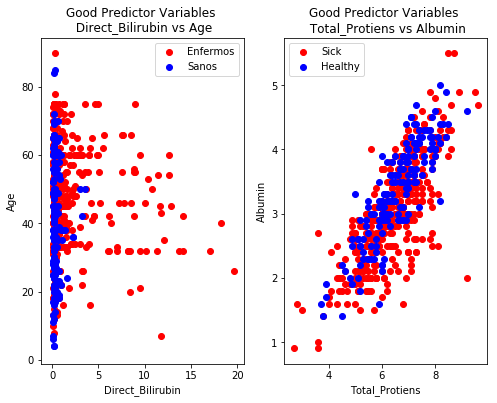

In [19]:
plt.figure(figsize=(8,6))
plt.subplot(121)

plt.scatter(dataset[dataset.Dataset==0].Direct_Bilirubin,dataset[dataset.Dataset==0].Age, color='red')
plt.scatter(dataset[dataset.Dataset==1].Direct_Bilirubin,dataset[dataset.Dataset==1].Age, color='blue')
plt.title('Good Predictor Variables \n Direct_Bilirubin vs Age')
plt.xlabel('Direct_Bilirubin')
plt.ylabel('Age')
plt.legend(['Enfermos','Sanos'])

plt.subplot(122)

plt.scatter(dataset[dataset.Dataset==0].Total_Protiens,dataset[dataset.Dataset==0].Albumin, color='red')
plt.scatter(dataset[dataset.Dataset==1].Total_Protiens,dataset[dataset.Dataset==1].Albumin, color='blue')
plt.title('Good Predictor Variables \n Total_Protiens vs Albumin')
plt.xlabel('Total_Protiens')
plt.ylabel('Albumin')
plt.legend(['Sick','Healthy'])
plt.show()

Como se ve en las graficas, aunque las primeras dos variables (Direct_Bilirubin y Age) no separan bien los elementos, algo de esperar por los resultados tan bajos obtenidos, si estan mejor separadas que con dos de las tres ultimas variables (Total_Protiens y Albumin)

In [49]:
#Con todas las variables 10
modelo_lr = LogisticRegression()
modelo_lr.fit(X=trainNorm_X.as_matrix()[:,:],y=train_Y)

predicion = modelo_lr.predict(testNorm_X.as_matrix()[:,:])
print('Regresion logistica con todas las variables\n')
print(metrics.classification_report(y_true=test_Y, y_pred=predicion))
print(f'accuracy_score={metrics.accuracy_score(y_true=test_Y, y_pred=predicion)}')



Regresion logistica con todas las variables

             precision    recall  f1-score   support

          0       0.73      0.98      0.84       126
          1       0.60      0.06      0.11        48

avg / total       0.70      0.73      0.64       174

accuracy_score=0.7298850574712644


In [58]:
trainNorm_X_copia=trainNorm_X.copy()
testNorm_X_copia=testNorm_X.copy()
allvar="";
#quitando variables
for i in regr_var[:0:-1]:
    allvar=allvar+i+", "
    trainNorm_X_copia=trainNorm_X_copia.drop(i,1)
    testNorm_X_copia=testNorm_X_copia.drop(i,1)
    modelo_lr = LogisticRegression()
    modelo_lr.fit(X=trainNorm_X_copia.as_matrix()[:,:],y=train_Y)
    
    print('Quitando \n'+allvar)
    predicion = modelo_lr.predict(testNorm_X_copia.as_matrix()[:,:])
    print(metrics.classification_report(y_true=test_Y, y_pred=predicion))
    print(f'accuracy_score={metrics.accuracy_score(y_true=test_Y, y_pred=predicion)}')

Quitando 
Total_Protiens, 
             precision    recall  f1-score   support

          0       0.73      1.00      0.85       126
          1       1.00      0.04      0.08        48

avg / total       0.81      0.74      0.63       174

accuracy_score=0.735632183908046
Quitando 
Total_Protiens, Gender, 
             precision    recall  f1-score   support

          0       0.73      1.00      0.84       126
          1       1.00      0.02      0.04        48

avg / total       0.80      0.73      0.62       174

accuracy_score=0.7298850574712644
Quitando 
Total_Protiens, Gender, Albumin, 
             precision    recall  f1-score   support

          0       0.72      1.00      0.84       126
          1       0.00      0.00      0.00        48

avg / total       0.52      0.72      0.61       174

accuracy_score=0.7241379310344828
Quitando 
Total_Protiens, Gender, Albumin, Albumin_and_Globulin_Ratio, 
             precision    recall  f1-score   support

          0       0.72

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [15]:
#EN chi^2 no se pueden usar valores negativos, por lo que no se pueden usar los datos normalizados 
chi = FS.chi2(X = train_X, y = train_Y)[0]
print(chi)
indice_chi=np.argsort(chi)[::-1]
print(indice_chi)
print(names[indice_chi])

[  3.09986039e+01   5.51354895e-01   2.51559925e+02   1.35709569e+02
   3.14835691e+03   3.91500995e+03   6.67628118e+03   1.01881419e-01
   2.21620469e+00   1.42431036e+00]
[6 5 4 2 3 0 8 9 1 7]
Index(['Aspartate_Aminotransferase', 'Alamine_Aminotransferase',
       'Alkaline_Phosphotase', 'Total_Bilirubin', 'Direct_Bilirubin', 'Age',
       'Albumin', 'Albumin_and_Globulin_Ratio', 'Gender', 'Total_Protiens'],
      dtype='object')


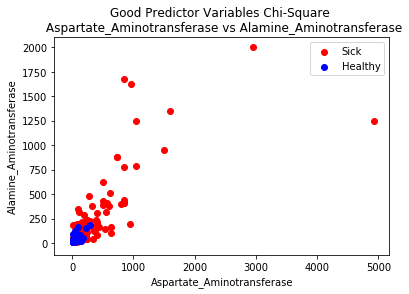

In [22]:
plt.figure()
plt.scatter(dataset[dataset.Dataset==0].Aspartate_Aminotransferase,dataset[dataset.Dataset==0].Alamine_Aminotransferase, color='red')
plt.scatter(dataset[dataset.Dataset==1].Aspartate_Aminotransferase,dataset[dataset.Dataset==1].Alamine_Aminotransferase, color='blue')
plt.title('Good Predictor Variables Chi-Square \n Aspartate_Aminotransferase vs Alamine_Aminotransferase')
plt.xlabel('Aspartate_Aminotransferase')
plt.ylabel('Alamine_Aminotransferase')
plt.legend(['Sick','Healthy'])
plt.show()

### LDA

In [59]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [69]:
for c in range(1,names.size):
    print(str(c)+" Componentes")
    lda = LDA(n_components=c)
    lda.fit(train_X,train_Y)
    print("Porcentaje explicado:", lda.explained_variance_ratio_)
    X_lda = pd.DataFrame(lda.fit_transform(train_X, train_Y))
    print (X_lda)
    

1 Componentes
Porcentaje explicado: [ 1.]
            0
0   -0.333980
1   -2.059523
2    1.297017
3    0.482921
4    0.524663
5    0.152216
6   -2.129344
7    0.402171
8    0.514754
9    0.891593
10   0.478597
11   0.810418
12  -2.602131
13   1.353956
14   0.384963
15  -0.481591
16   0.731612
17  -0.272315
18  -1.494581
19   1.030442
20  -2.303255
21  -0.572306
22  -1.082804
23   0.000693
24   0.010330
25  -1.051779
26  -0.492111
27  -0.520088
28   0.112003
29  -2.422140
..        ...
375 -3.451241
376 -0.731615
377  0.640865
378  1.087160
379  0.397466
380  0.624148
381  0.757262
382  1.269257
383  0.578899
384 -4.282316
385  0.136196
386  0.290998
387 -1.221796
388  0.345512
389  0.818896
390  0.502128
391  0.011624
392  0.498887
393 -0.480084
394  0.196026
395  0.901930
396  0.572449
397  0.091561
398 -1.405430
399  0.554659
400  0.963108
401  0.414970
402  0.860828
403  0.152008
404  0.599983

[405 rows x 1 columns]
2 Componentes
Porcentaje explicado: [ 1.]
            0
0   -0.333